In [ ]:
## 足球运动员分析案例
### 需求
从众多的足球运动员中，发现统计一些关于足球运动员的共性，或某些潜在规律
### 数据集
数据集包含2017年所有活跃的足球运动员，主要包含名称、年龄、国籍、所效力俱乐部、各项技术评分和综合评分等信息。
* Name 姓名
* Nationality 国籍
* National_Position 国家队位置
* National_Kit 国家队号码
* Club 所在俱乐部
* Club_Position 所在俱乐部位置
* Club_Kit 俱乐部号码
* Club_Joining 加入俱乐部时间
* Contract_Expiry 合同到期时间
* Rating 评分
* Height 身高
* Weight 体重
* Preffered_Foot 擅长左（右）脚
* Birth_Date 出生日期
* Age 年龄
* Preffered_Position 擅长位置
* Work_Rate 工作效率
* Weak_foot 非惯用脚使用频率
* Skill_Moves 技术等级
* Ball_Control 控球技术
* Dribbling 盘球（带球）能力
* Marking 盯人能力
* Sliding_Tackle 铲球
* Standing_Tackle 逼抢能力
* Aggression 攻击能力
* Reactions 反映
* Attacking_Position 攻击性跑位
* Interceptions 抢断
* Vision 视野
* Composure 镇静
* Crossing 下底传中
* Short_Pass 短传
* Long_Pass 长传
* Acceleration 加速度
* Speed 速度
* Stamina 体力
* Strength 强壮
* Balance 平衡
* Agility 敏捷度
* Jumping 跳跃
* Heading 投球
* Shot_Power 射门力量
* Finishing 射门
* Long_Shots 远射
* Curve 弧线
* Freekick_Accuracy 任意球精准度
* Penalties 点球
* Volleys 凌空能力
* GK_Positioning 门将位置感
* GK_Diving 扑救能力
* GK_Kicking 门将踢球能力
* GK_Handling 扑球脱手几率
* GK_Reflexes 门将反应度

### 程序实现
#### 导入相关库
导入numpy、pandas和matplotlib库，并支持图形的中文显示

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#支持中文显示
mpl.rcParams['font.family']='Kaiti'
# 使用非unicode的负号，当使用中文时候要设置
mpl.rcParams['axes.unicode_minus']=False
%matplotlib inline

#### 加载相关数据集
* 加载相关数据集(注意原数据集中是否存在标题),并查看数据的大致情况
* 可使用head/tail，也可以使用sample
* 行与列没有完整显示，可以设置

In [2]:
# 注意是否存在标题
players = pd.read_csv('data/FullData.csv')
# 使用head tail sample大致看下数据集基本情况
# players.head()
# players.tail()
# players.sample(10)
# 设置显示完整的列
# display.[max_categories, max_columns, max_colwidth, max_info_columns,
#   max_info_rows, max_rows, max_seq_items,
pd.set_option('display.max_columns',30)
# players.head()
pd.set_option('display.max_rows',100)
# players

#### 数据探索与清洗
查看缺失值，异常值与重复值
1. 通过info查看数据缺失值，再通过isnull、any、dropna、fillna等方法对缺失值进行处理
2. 通过describe查看数据分布情况，可使用箱线图进行辅助
3. 使用duplicate检查重复值

In [3]:
# 查看缺失值
# players.info()
# info后对数据进行整体的查看，发现National_Position(国家队文字)和National_Kit（国家队号码)存在大量的缺失值
# 分析得到该缺失值正常现象，并不是这些数据不完整（只有少量球员才能加入国家队）
# isnull+any查看缺失值
# players['Club_Position'].isnull().any()
# 找出缺失值数据记录
# players[players['Club_Position'].isnull()]
# 对缺失值进行过滤使用 notnull ，非缺失值返回True，对应的数据保留，缺失值False，对应的数据删除
players = players[players['Club_Position'].notnull()]
# 再次调用ifo方法查看缺失值过滤结果
# players.info()

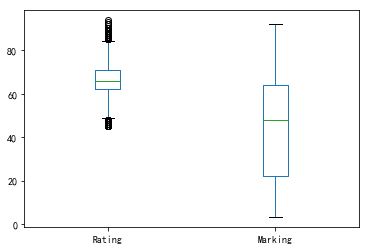

In [4]:
# 异常值处理
# describe方法得到数据的描述性统计信息，比如max min，mean，std进行异常值分析
# players.describe()
# 还可以使用箱线图辅助查看异常值
# players.plot(kind='box')
players[['Rating','Marking']].plot(kind='box')
# players['Rating'].describe()

In [5]:
# 重复值
players.duplicated().any()
# 没有重复值

# 如果有重复值，查看重复的数据是什么，根据duplicated得到布尔数据，将布尔数组传递给players，得到重复值数据
# 设置keep参数，【first last False】
# players[players.duplicated()]
# 如果想查看数据集中所有重复数据
# players[players.duplicated(keep=False)]
# 假设存在重复值，删除重复值,可以通过keep设置删除的方式，【first last False】
# players.drop_duplicates(inplace=True)

False

#### 身高与体重处理
将身高与体重处理成数值类型，便于分析。处理方式可以多种，例如，使用矢量化相关操作(替换，正则提取),map,apply等

In [6]:
# 使用矢量化字符串方式处理
players['Height'] = players['Height'].str.replace('cm','')
players['Weight'] = players['Weight'].str.replace('kg','')
# players.head()
# players.info()
# 替换后，身高和体重仍然是Object类型，不是数值型，需要进一步的类型转换
players['Height'] = players['Height'].astype(np.int)
players['Weight'] = players['Weight'].astype(np.int)
players.info()

# players.head()
# players.info()
# 使用map和apply
# def handle(item):
#     return int(item.replace('cm',''))
# players['Height'] = players['Height'].map(lambda item:int(item.replace('cm','')))
# players['Weight'] = players['Weight'].map(lambda item:int(item.replace('kg','')))
# players.head()
# players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17587 entries, 0 to 17587
Data columns (total 53 columns):
Name                  17587 non-null object
Nationality           17587 non-null object
National_Position     1075 non-null object
National_Kit          1075 non-null float64
Club                  17587 non-null object
Club_Position         17587 non-null object
Club_Kit              17587 non-null float64
Club_Joining          17587 non-null object
Contract_Expiry       17587 non-null float64
Rating                17587 non-null int64
Height                17587 non-null int32
Weight                17587 non-null int32
Preffered_Foot        17587 non-null object
Birth_Date            17587 non-null object
Age                   17587 non-null int64
Preffered_Position    17587 non-null object
Work_Rate             17587 non-null object
Weak_foot             17587 non-null int64
Skill_Moves           17587 non-null int64
Ball_Control          17587 non-null int64
Dribbling        

#### 运动员身高，体重，评分信息分布

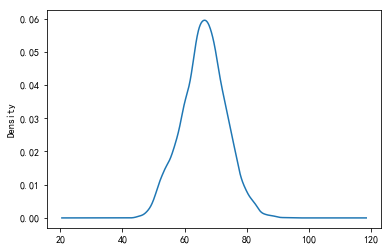

In [7]:
# players['Height'].describe()
# 使用直方图查看分布
# plt.hist(players['Height'])
# players['Height'].plot(kind='hist',bins=15)
# players['Weight'].plot(kind='hist',bins=15)
# players['Rating'].plot(kind='hist',bins=15)
# 使用核密度图查看数据分布
# players['Height'].plot(kind='kde')
# players['Weight'].plot(kind='kde')
players['Rating'].plot(kind='kde')

#### 左脚与右脚选手在数量上是否存在偏差

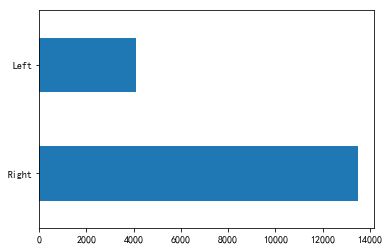

In [16]:
# Preffered_Foot
# players['Preffered_Foot'].head(10)
# g = players.groupby('Preffered_Foot')
# g.count()
# s = g['Preffered_Foot'].count()
# display(type(s))
# 使用柱状图或饼图展示左右脚选手数量的差别
# s.plot(kind='bar')
# s.plot(kind='pie',autopct='%.2f')

# 我们可以使用Sereis的value_counts进行简化操作
# 上面的操作，其实就是针对Preffered_Foot分组，再统计每组的数量
players['Preffered_Foot'].value_counts().plot(kind='barh')

#### 从球员平均分角度，拥有top10评分能力俱乐部/国家

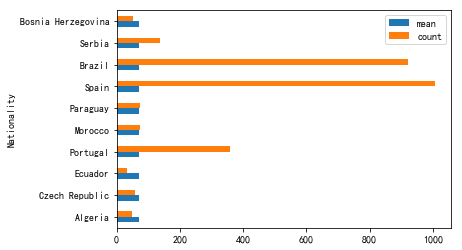

In [27]:
# 哪个俱乐部球员的平均最高，俱乐部人数大于20
# group=players.groupby('Club')
# display(group['Rating'].mean(),type(group['Rating'].mean()))
# group['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='barh')

# 同时要求俱乐部人数大于20
# group['Rating'].agg(['mean','count']).sort_values('mean',ascending=False).head(10).plot(kind='bar')

# #哪个国家球员的平均最高，国家人数大于20
group=players.groupby('Nationality')
result = group['Rating'].agg(['mean','count']).sort_values('mean',ascending=False)
result = result[result['count']>20]
result.head(10).plot(kind='barh')

#### 哪个俱乐部更有能力留住球员(5年及以上)

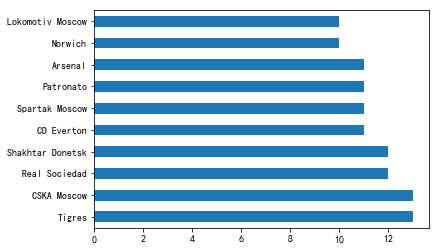

In [47]:
# Club_Joining 加入俱乐部时间 Contract_Expiry 合同到期时间
# r = players[['Club_Joining','Contract_Expiry']]
# 由于不存2017年前合同到期的球员，根据2017-加入合同的时间，得到就是球员在俱乐部的效力时间
# r[players['Contract_Expiry']<2017]
# 取出加入俱乐部的年份
# year = players['Club_Joining'].map(lambda x:x.split('/')[-1])
# display(year,type(year))
# 进行类型转换，转成数值型
# year = year.astype(np.int64)
# players['Work_Year'] = 2017-year
# players.info()

# 数据集增加工作年限限定，过滤小于5年的数据
# result = players[players['Work_Year']>=5]
# result
# 结果中存在Free Agents只有球员，不参与统计
result = result[result['Club']!='Free Agents']
# 根据俱乐部分组，统计球员，人数多证明俱乐部更有能力留住
result['Club'].value_counts(ascending=False).head(10).plot(kind='barh')

#### 足球运动员是否与出生日期相关
* 全体球员
* 知名球员(80分及以上)

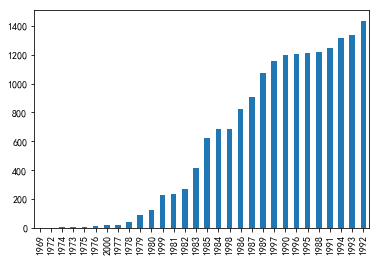

In [94]:
# players['Birth_Date']

# 全体球员
# 对球员的日期进行切分，扩展为3列
# t = players['Birth_Date'].str.split('/',expand=True)
# 对月份进行分析：根据月份来分组，统计每一个月对应球员数量，最后柱状图表示
# t[0].value_counts().sort_values(ascending=True).plot(kind='bar')
# t[1].value_counts().sort_values(ascending=True).plot(kind='bar')
# t[2].value_counts().sort_values(ascending=True).plot(kind='bar')

# 知名球员
# 将大于等于80的球员数据保留下来
# t = players[players['Rating']>=80]
# t = players['Birth_Date'].str.split('/',expand=True)
# t[0].value_counts().sort_values(ascending=True).plot(kind='bar')
# t[1].value_counts().sort_values(ascending=True).plot(kind='bar')
t[2].value_counts().sort_values(ascending=True).plot(kind='bar')

#### 身高与体重是否具有相关性
* 散点图
* 相关系数

In [101]:
# 通过散点图查看变量之间关系：身高与体重
# players.plot(kind='scatter',x='Height',y='Weight')
# # 身高和评分之间的关系
# players.plot(kind='scatter',x='Height',y='Rating')

# players['Height'].corr(players['Weight'])
players['Height'].corr(players['Rating'])

0.046937095897011116

#### 哪些指标对评分影响最大

In [106]:
# type(players.corr())
players.corr()['Rating'].sort_values(ascending=False)

Rating                1.000000
Reactions             0.828329
Composure             0.613612
Short_Pass            0.496239
Vision                0.489277
Long_Pass             0.483217
Ball_Control          0.463211
Age                   0.458098
Shot_Power            0.441773
Curve                 0.420796
Long_Shots            0.419517
Aggression            0.404422
Crossing              0.401851
Freekick_Accuracy     0.399575
Volleys               0.386494
Strength              0.369045
Dribbling             0.368565
Stamina               0.355335
Attacking_Position    0.354501
Heading               0.343265
Penalties             0.339898
Finishing             0.328576
Interceptions         0.319504
Jumping               0.289840
Agility               0.283309
Skill_Moves           0.251926
Standing_Tackle       0.249156
Marking               0.236843
Weak_foot             0.226263
Speed                 0.224253
Sliding_Tackle        0.215385
Acceleration          0.206392
Work_Yea

#### 年龄和评分具有怎样的关系

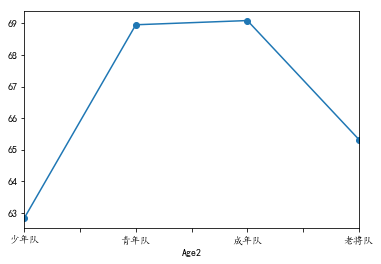

In [111]:
# 散点图
# players.plot(kind='scatter',x='Age',y='Rating')
# # 相关系数
# players['Age'].corr(players['Rating'])

# cut将数据切分为离散区间表示，bins表示切分成几个区间
# 默认情况下，区间对应数值范围，通过labels设置区间标签内容
# pd.cut(players['Age'],bins=4,labels=['少年队','青年队','成年队','老将队'])
# 根据年龄段来分组，统计每组年龄均值，用折线图描述年龄段和评分之间关系
players['Age2'] = pd.cut(players['Age'],bins=4,labels=['少年队','青年队','成年队','老将队'])
players.groupby('Age2')['Rating'].mean().plot('line',marker='o')

# bins设置区间个数，区间等分
# 还可以自定义区间范围
pd.cut(players['Age'],bins=[10,16,22,33,45],labels=['少年队','青年队','成年队','老将队'])